In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [2]:
N = 100
X = np.random.random(N) * 6 - 3
y = 0.5 * X - 1 + np.random.randn(N) * 0.5

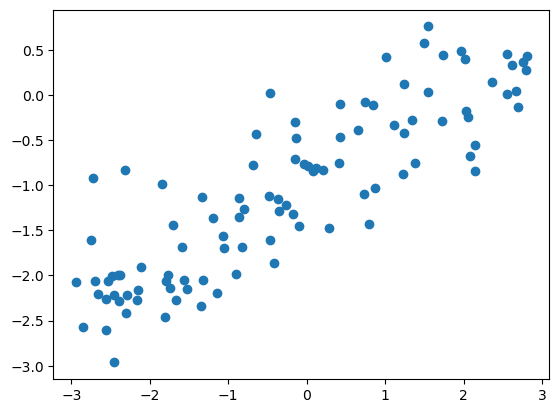

In [3]:
plt.scatter(X, y);

In [4]:
# build model
# HOMEWORK
i = Input(shape=(1,))
x = Dense(1)(i)  #actually completing the output = mx input + b

model = Model(i,x)

In [ ]:
model.summary()

# none in output is similar to wildcar; it can take any dimension
# Parma is the slope and intercept

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.compile(
    loss = 'mse',                    
    # optimizer = 'adam',
    optimizer = Adam(learning_rate=0.1), #gradient descent method for training our model
    metrics=['mae']
)

In [ ]:
r = model.fit(
    X.reshape(-1,1), y,  # -1 is a wildcard. it becomes whatever is left; size if N x D (rows X columns)
    epochs = 200,
    batch_size = 30,
)

Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.0437 - mae: 0.9161  
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4624 - mae: 0.5746 
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2819 - mae: 0.4284 
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2564 - mae: 0.4013 
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2718 - mae: 0.4148 
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3164 - mae: 0.4351 
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2525 - mae: 0.3734 
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2678 - mae: 0.4017 
Epoch 9/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2422 - mae: 0.4009 
Epoch 10/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2361 - mae: 0.3894 
Epoch 11/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2465 - mae: 0.3918 
Epoch 12/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2410 - mae: 0.3848 
Epoch 13/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/ste

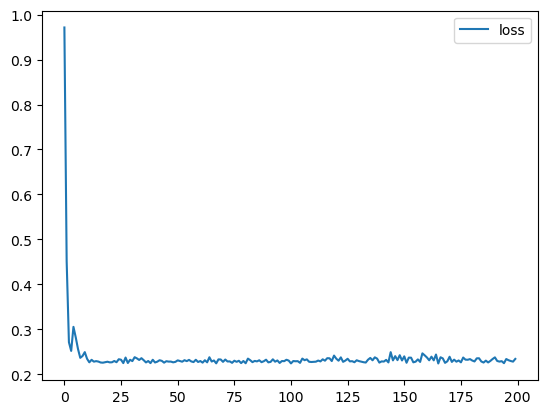

In [8]:
# plot loss per iteration
plt.plot(r.history['loss'], label ='loss')
plt.legend();

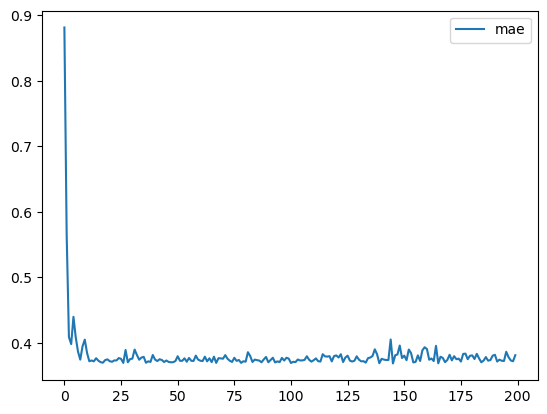

In [9]:
# plot mae per iteration
plt.plot(r.history['mae'], label ='mae')
plt.legend();

In [11]:
# make predictions
Xtest = np.linspace(-3,3,20).reshape(-1,1)
ptest = model.predict(Xtest)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


![](https://deeplearningcourses.com/notebooks_v3_pxl?sc=1X0W-A1Q1NamqpkTrnERKQ&n=Linear+Regression+%28Warmup+%26+Syntax%29)

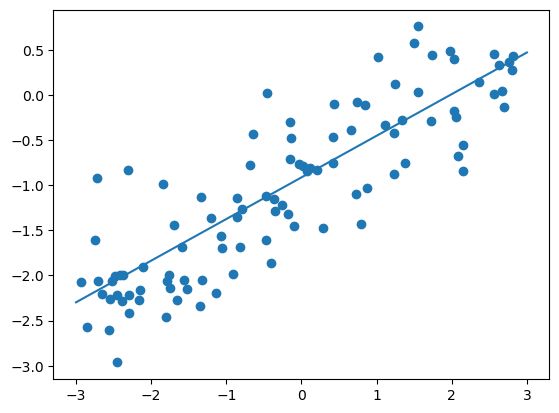

In [12]:
plt.scatter(X,y)
plt.plot(Xtest, ptest)